In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math



hp_business = pd.read_excel('./Hp Business Analytics Dataset.xlsx')

print(hp_business.columns)

# print(int(hp_business['Number of Funding Rounds']))
hp_business.head()


print(hp_business.info())

# hp_business = hp_business.fillna('NA')

print(hp_business.size)

print(hp_business['Company Type'].unique())

Index(['Organization Name', 'Organization Name URL', 'Headquarters Location',
       'Industries', 'Last Funding Type', 'Last Funding Date',
       'Last Funding Amount', 'Last Funding Amount Currency',
       'Last Funding Amount Currency (in USD)', 'Number of Employees',
       'Total Funding Amount', 'Total Funding Amount Currency',
       'Total Funding Amount Currency (in USD)', 'Number of Funding Rounds',
       'Acquisition Status', 'Acquired by', 'Acquired by URL',
       'Number of Acquisitions', 'Acquisition Price Currency (in USD)',
       'Number of Founders', 'Unnamed: 20', 'Acquisition Price',
       'Price Currency', 'Company Type', 'Founded Date', 'Twitter', 'Facebook',
       'LinkedIn', 'Funding Status', 'Acquisition Type', 'Announced Date',
       'Estimated Revenue Range'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dty

In [3]:
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 100000)

In [33]:
# hp_business['Founded Date'] = pd.to_datetime(hp_business['Founded Date'])

# hp_business['Founded Date'] = hp_business['Founded Date'].dt.year

hp_business['Founded Date'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [5]:
print(len(list(hp_business['Total Funding Amount Currency (in USD)'].unique())))

5445


In [6]:
#Note the Total Funding amount currency in usd is now times 10^6

# hp_business['Total Funding Amount Currency (in USD)'] = hp_business['Total Funding Amount Currency (in USD)']/1000000


# hp_business['Total Funding Amount Currency (in USD)'] = round(hp_business['Total Funding Amount Currency (in USD)'])
hp_business['Total Funding Amount Currency (in USD)']


hp_business['Total Funding Amount Currency (in USD)'].unique()


array([9.6500000e+07, 3.3202069e+07, 4.7057093e+07, ..., 2.2658000e+04,
       1.1461000e+04, 4.1350000e+04])

In [7]:
hp_business['Acquisition Status']

0                                    NaN
1                                    NaN
2                                    NaN
3                                    NaN
4                                    NaN
5                                    NaN
6                                    NaN
7                                    NaN
8                                    NaN
9                                    NaN
10                     Made Acquisitions
11                                   NaN
12                                   NaN
13                                   NaN
14                                   NaN
15                     Made Acquisitions
16                                   NaN
17                                   NaN
18                                   NaN
19                                   NaN
20                                   NaN
21                                   NaN
22                                   NaN
23                                   NaN
24              

In [8]:
# print(hp_business.columns)

print(hp_business.size)

688896


In [31]:
groupings = ['Last Funding Type','Number of Funding Rounds','Industries','Acquisition Status','Acquired by','Number of Acquisition','Company Type','Funding Status','Acquisition Type','Estimated Revenue Range','Number of Employees']
for i in hp_business.columns:
    if i in groupings:
        print(hp_business[i].unique(), len(hp_business[i].unique()), f'{i}')


vc_company = hp_business['Acquired by'].unique()

startup_location = hp_business['Headquarters Location'].unique()

['Apps, Autonomous Vehicles, Internet, Sensor, Transportation'
 'Developer APIs, Health Care, Medical, Medical Device, Messaging, Pharmaceutical'
 'Logistics, Shipping, Supply Chain Management' ... 'Education, Training'
 'Information Technology, Machine Learning'
 'Construction, Service Industry'] 15862 Industries
['Series C' 'Venture - Series Unknown' 'Debt Financing' 'Series B'
 'Initial Coin Offering' 'Series A' 'Undisclosed' 'Seed'
 'Convertible Note' 'Angel' 'Post-IPO Secondary' 'Series D'
 'Corporate Round' 'Grant' 'Product Crowdfunding' 'Private Equity'
 'Post-IPO Equity' 'Equity Crowdfunding' 'Non-equity Assistance'
 'Pre-Seed' nan 'Series E' 'Secondary Market' 'Post-IPO Debt' 'Series F'
 'Series G'] 26 Last Funding Type
['101-250' '11-50' '51-100' nan '1-10' '1,001-5,000' '10001+' '251-500'
 '501-1000' '1001-5000' '5001-10000'] 11 Number of Employees
[ 4.  3.  5.  1.  7.  8.  6.  2.  9. nan 13. 10. 12. 11. 14.] 15 Number of Funding Rounds
[nan 'Made Acquisitions' 'Was Acquired

In [10]:
country_location=[]
for i in startup_location:
#     country_location.append(i.split(','))
    try:
        i= i.split(',')
        x= len(i) - 1
        country_location.append(i[x])
    except AttributeError:
        pass
 


# print(country_location)

unique_country = set(country_location)

print(unique_country)

total_countries = len(unique_country)

print(total_countries)

{' The Netherlands', ' Moldova', ' Nepal', ' Isle of Man', ' Switzerland', ' Ghana', ' China', ' Lithuania', 'Belgrade', ' South Africa', ' Malaysia', ' Thailand', ' Saudi Arabia', ' Denmark', ' United Arab Emirates', ' Peru', ' Macedonia', ' Montenegro', ' Uganda', ' Belgium', ' Bermuda', ' Tunisia', ' Poland', ' Ecuador', ' Estonia', ' Singapore', ' Zimbabwe', ' Mongolia', ' Cambodia', ' Afghanistan', ' Turkey', ' Senegal', ' Namibia', ' Myanmar', ' Sweden', ' Dominican Republic', ' Slovakia (Slovak Republic)', ' Tanzania', ' Japan', ' Trinidad and Tobago', ' Liechtenstein', ' Albania', ' Honduras', ' Chile', ' Philippines', ' United Kingdom', ' France', ' Finland', ' Gibraltar', ' Germany', ' Venezuela', ' Armenia', ' Colombia', ' India', " CÃ´te d'Ivoire", ' Israel', ' Lebanon', ' Malta', ' Syria', ' Cyprus', ' Latvia', ' Brazil', ' Occupied', ' Uruguay', ' Ukraine', ' Rwanda', ' Portugal', ' Kazakhstan', ' Maldives', ' Panama', ' Azerbaijan', ' South Korea', ' Argentina', ' Benin'

In [11]:
hp_business.describe()

Last Funding Amount  Last Funding Amount Currency (in USD)  \
count         9.924000e+03                           9.924000e+03   
mean          3.443762e+07                           1.218798e+07   
std           5.335483e+08                           4.751057e+07   
min           1.000000e+03                           1.000000e+03   
25%           7.500000e+05                           6.874405e+05   
50%           2.885677e+06                           2.509196e+06   
75%           1.000000e+07                           9.106738e+06   
max           3.000000e+10                           2.600000e+09   

       Total Funding Amount  Total Funding Amount Currency (in USD)  \
count          1.103800e+04                            1.103800e+04   
mean           3.664472e+07                            1.967612e+07   
std            5.042569e+08                            9.479053e+07   
min            1.000000e+03                            1.000000e+03   
25%            1.000000e+06                            9.700000e+05   
50%            3.500000e+06                            3.307082e+06   
75%            1.255587e+07                            1.200000e+07   
max            3.000000e+10                            4.100000e+09   

       Number of Funding Rounds  Number of Acquisitions  \
count              12473.000000              731.000000   
mean                   2.309549                1.454172   
std                    1.479869                1.213630   
min                    1.000000                1.000000   
25%                    1.000000                1.000000   
50%                    2.000000                1.000000   
75%                    3.000000                1.000000   
max                   14.000000               17.000000   

       Acquisition Price Currency (in USD)  Number of Founders  Unnamed: 20  \
count                         5.300000e+01        16119.000000          0.0   
mean                          3.949920e+08            1.997829          NaN   
std                           7.533893e+08            1.050792          NaN   
min                           1.440760e+06            0.000000          NaN   
25%                           3.006000e+07            1.000000          NaN   
50%                           1.700000e+08            2.000000          NaN   
75%                           4.500000e+08            3.000000          NaN   
max                           4.900000e+09           10.000000          NaN   

       Acquisition Price  
count       5.300000e+01  
mean        3.967445e+08  
std         7.525737e+08  
min         1.480000e+06  
25%         3.770000e+07  
50%         1.700000e+08  
75%         4.500000e+08  
max         4.900000e+09

In [69]:
latest_startup = hp_business[hp_business['Founded Date'] >= 2019]
company_fundyearvaluation = latest_startup.groupby(['Founded Date','Last Funding Type','Estimated Revenue Range'])[['Organization Name']].count()

company_fundyearvaluation



Organization Name
Founded Date Last Funding Type        Estimated Revenue Range                   
2019         Angel                    $1M to $10M                              3
             Convertible Note         Less than $1M                            2
             Corporate Round          $1M to $10M                              1
             Debt Financing           $1M to $10M                              2
                                      Less than $1M                            1
             Equity Crowdfunding      Less than $1M                            1
             Grant                    Less than $1M                            3
             Initial Coin Offering    Less than $1M                            1
             Pre-Seed                 $10M to $50M                             1
                                      $1M to $10M                              6
                                      Less than $1M                           10
             Secondary Market         $1M to $10M                              1
             Seed                     $10M to $50M                             6
                                      $1M to $10M                             21
                                      Less than $1M                           25
             Series A                 $10M to $50M                             4
                                      $1M to $10M                             11
                                      Less than $1M                            7
             Series B                 $1M to $10M                              2
             Undisclosed              Less than $1M                            2
             Venture - Series Unknown $10M to $50M                             1
                                      Less than $1M                            3
2020         Angel                    Less than $1M                            1
             Grant                    $1M to $10M                              1
             Seed                     $1M to $10M                              1
                                      Less than $1M                            2
             Series B                 $1M to $10M                              1

Text(0.5, 1.0, 'Startup between 2019 and 2020 Data')

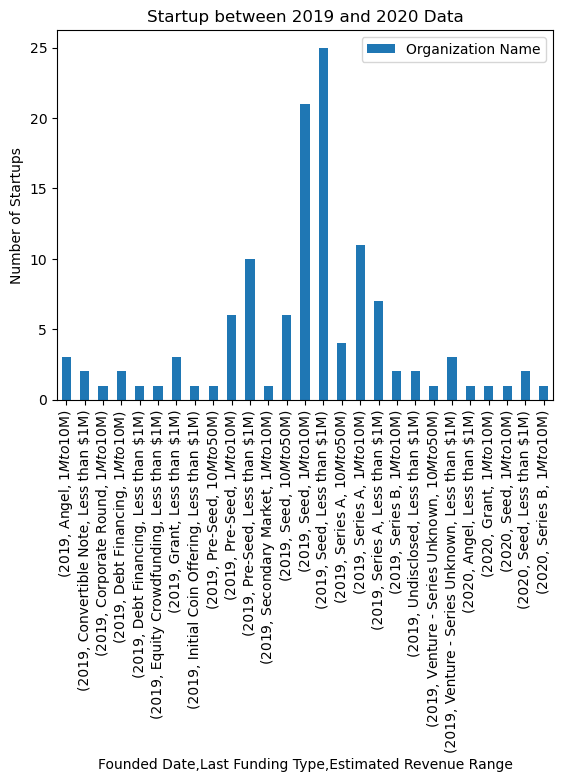

In [70]:
company_fundyearvaluation.plot(kind='bar')
plt.ylabel('Number of Startups')
plt.title('Startup between 2019 and 2020 Data')

In [117]:
out_startup = latest_startup[latest_startup['Estimated Revenue Range'] != 'Less than $1M' ]
watch_out_startup = out_startup[out_startup['Number of Founders'] >= 1]
top_startups = watch_out_startup[watch_out_startup['Total Funding Amount Currency (in USD)'] >= 1]


# top_startups.to_csv('./topstartups.csv')

startup_report = top_startups[['Organization Name','Industries','Total Funding Amount Currency (in USD)','Organization Name URL']].sort_values(by='Total Funding Amount Currency (in USD)', ascending=False)
startup_report.to_excel('top_startups.xlsx')
# watch_out_startup_grouping = watch_out_startup.groupby(['Last Funding Type'])[]

In [112]:
# plt.plot(startup_report['Organization Name'],startup_report['Total Funding Amount Currency (in USD)'])
# plt.xlabel('Company Name')
# plt.ylabel('Total Amount in Millions of Dollars')
# plt.show()

In [12]:
#Data queries
# for i in hp_business['Last Funding Type'].unique():
#     print(i)
#     startup_revenue_range= hp_business[hp_business['Last Funding Type'] == f'{i}']
#     startup_revenue_range.to_csv(f'./{i}.csv')

# startup_revenue_range

In [13]:
#The new dataset extracted is based on the following conditions
#1. startup more than 1m 
#2. startups created for profit
#3. startups in Series C, Series B, Series A,'Series D','Seed','Grant','Angel', 'Venture - Series Unknown','Equity Crowdfunding','Pre-Seed'
#4. 

In [14]:
last_funding_type =  hp_business['Last Funding Type'].unique()

last_funding_type

array(['Series C', 'Venture - Series Unknown', 'Debt Financing',
       'Series B', 'Initial Coin Offering', 'Series A', 'Undisclosed',
       'Seed', 'Convertible Note', 'Angel', 'Post-IPO Secondary',
       'Series D', 'Corporate Round', 'Grant', 'Product Crowdfunding',
       'Private Equity', 'Post-IPO Equity', 'Equity Crowdfunding',
       'Non-equity Assistance', 'Pre-Seed', nan, 'Series E',
       'Secondary Market', 'Post-IPO Debt', 'Series F', 'Series G'],
      dtype=object)

In [15]:
hp_dataset_industries = hp_business.groupby('Industries')[['Total Funding Amount Currency (in USD)']].mean()

hp_dataset_industries = hp_dataset_industries.dropna()

hp_dataset_industries

Total Funding Amount Currency (in USD)
Industries                                                                                
3D Printing, 3D Technology, Advanced Materials,...                            7.000000e+05
3D Printing, 3D Technology, Android, Artificial...                            2.200000e+05
3D Printing, 3D Technology, Apps, CAD, Industri...                            7.300000e+06
3D Printing, 3D Technology, CAD, Retail, Retail...                            5.000000e+04
3D Printing, 3D Technology, Chemical, Printing                                3.250000e+05
3D Printing, 3D Technology, Consumer Electronic...                            4.320000e+06
3D Printing, 3D Technology, Consumer Electronic...                            2.150000e+07
3D Printing, 3D Technology, Health Care, Medica...                            3.646796e+06
3D Printing, 3D Technology, Image Recognition, ...                            1.200000e+05
3D Printing, 3D Technology, Industrial Manufact...                            3.426569e+06
3D Printing, 3D Technology, Manufacturing                                     1.200000e+07
3D Printing, 3D Technology, Manufacturing, Prin...                            4.047539e+06
3D Printing, 3D Technology, Printing, Product D...                            7.500000e+05
3D Printing, Advanced Materials, Dental, Health...                            6.550000e+06
3D Printing, Advanced Materials, Industrial Aut...                            1.230000e+07
3D Printing, Advanced Materials, Industrial, In...                            1.790000e+07
3D Printing, Advanced Materials, Manufacturing                                1.900000e+06
3D Printing, Artificial Intelligence, Drones, M...                            2.120000e+06
3D Printing, Biotechnology, Health Care, Medical                              1.062000e+07
3D Printing, Biotechnology, Life Science, Medical                             4.275776e+06
3D Printing, CRM, E-Commerce, Enterprise Resour...                            9.200000e+05
3D Printing, CleanTech, Construction, Energy Ef...                            1.060000e+06
3D Printing, Computer, Software                                               2.760000e+07
3D Printing, Digital Marketing, E-Commerce, Int...                            7.283042e+06
3D Printing, E-Commerce, Retail                                               1.250000e+06
3D Printing, Electronics, Manufacturing                                       1.112750e+07
3D Printing, Electronics, Mobile                                              2.842825e+06
3D Printing, Enterprise Resource Planning (ERP)...                            9.100000e+06
3D Printing, Health Care, Manufacturing, Medica...                            8.109922e+06
3D Printing, Health Care, Medical Device                                      1.868969e+07
3D Printing, Health Care, Medical Device, Weara...                            1.500000e+05
3D Printing, Industrial Engineering, Manufactur...                            6.327491e+06
3D Printing, Industrial, Manufacturing                                        8.900000e+05
3D Printing, Logistics, Manufacturing                                         6.535990e+05
3D Printing, Machinery Manufacturing, Manufactu...                            1.350000e+06
3D Printing, Manufacturing, Medical Device                                    1.500000e+04
3D Printing, Manufacturing, Robotics                                          6.650000e+06
3D Printing, Manufacturing, Software                                          1.119068e+06
3D Technology, Aerospace, Architecture, Artific...                            4.033714e+06
3D Technology, Aerospace, Manufacturing, Space ...                            1.857200e+08
3D Technology, Animation, Artificial Intelligen...                            1.600000e+06
3D Technology, Animation, Cloud Management, Ent...                            7.334598e+06
3D Technology, Apps, Artificial Intelligence, B.

Text(0, 0.5, 'Number of Startups')

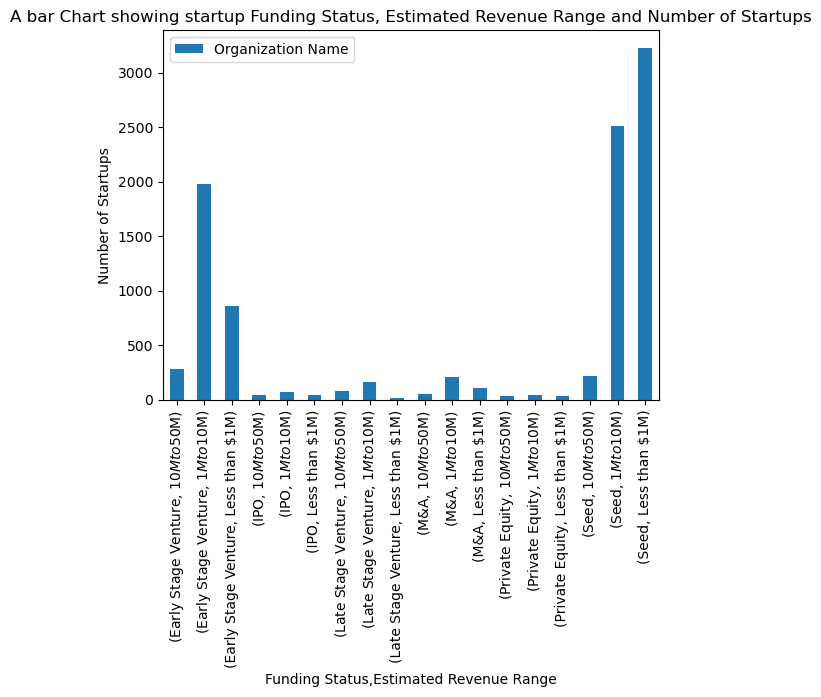

In [19]:
funding_status = hp_business.groupby(['Funding Status','Estimated Revenue Range'])[['Organization Name']].count()


funding_status.plot(kind='bar')
plt.title('A bar Chart showing startup Funding Status, Estimated Revenue Range and Number of Startups')
plt.xlabel('Funding Status,Estimated Revenue Range')
plt.ylabel('Number of Startups')

In [21]:
acquisition_price = hp_business[['Organization Name','Acquisition Price','Estimated Revenue Range']]

acquired_startups = acquisition_price.dropna()

acquired_startups


Organization Name  Acquisition Price Estimated Revenue Range
1089                      Audiens       1.480000e+06             $1M to $10M
1113              6 River Systems       4.500000e+08             $1M to $10M
1124                     PaySense       1.850000e+08             $1M to $10M
1457                      Scootsy       8.000000e+06             $1M to $10M
1489                        SECDO       1.000000e+08             $1M to $10M
1630             Cell Design Labs       5.670000e+08             $1M to $10M
1666           Athena Art Finance       1.700000e+08             $1M to $10M
1681                 Feature Labs       3.770000e+07             $1M to $10M
1728                 Origin House       8.500000e+08             $1M to $10M
1783              Xchange Leasing       4.000000e+08             $1M to $10M
1964                       Emblem       1.732000e+07             $1M to $10M
2017               Armis Security       1.000000e+09            $10M to $50M
2025                  Forty Seven       4.900000e+09            $10M to $50M
2033                     GitPrime       1.700000e+08            $10M to $50M
2052                       Anchor       1.400000e+08            $10M to $50M
2065                Stadium Goods       2.500000e+08            $10M to $50M
2079            Neon Therapeutics       6.700000e+07            $10M to $50M
2103           Semma Therapeutics       9.500000e+08            $10M to $50M
2162                    Xingkeduo       3.500000e+08            $10M to $50M
2256                  TEG Pty Ltd       1.300000e+09            $10M to $50M
2389                    Twistlock       4.100000e+08             $1M to $10M
3213          Endemol Shine Group       2.200000e+09            $10M to $50M
3891                   Nabobil.no       1.200000e+07             $1M to $10M
4719                  Able Health       2.700000e+07           Less than $1M
5518                     Oak Labs       1.600000e+07             $1M to $10M
6268                   WearLively       8.500000e+07             $1M to $10M
6381                       DRIVIN       4.300000e+07             $1M to $10M
7195                      Demisto       5.600000e+08            $10M to $50M
8552                      RedLock       1.730000e+08            $10M to $50M
8636                    RealSport       2.400000e+06             $1M to $10M
8643   Trilogy Education Services       7.500000e+08             $1M to $10M
9344             Innov8 Coworking       3.000000e+07             $1M to $10M
9496                     Honeypot       5.700000e+07             $1M to $10M
9998                       Opcity       2.100000e+08            $10M to $50M
12073                       Quidd       8.000000e+06             $1M to $10M
12584                  ChameleonX       2.000000e+07             $1M to $10M
12589          Modis Therapeutics       2.500000e+08             $1M to $10M
12594          Tilos Therapeutics       7.730000e+08             $1M to $10M
12651               Meta Networks       1.200000e+08             $1M to $10M
12663                      Jungla       5.000000e+07             $1M to $10M
12805                   Xtract AI       6.000000e+06             $1M to $10M
12979       BlueRock Therapeutics       1.000000e+09            $10M to $50M
12983                     Cheddar       2.000000e+08            $10M to $50M
13556              Tesseract Inc.       1.025000e+08           Less than $1M
15197                      Heptio       5.500000e+08             $1M to $10M
15524                     Cognigo       7.000000e+07           Less than $1M
16091                     Xnor.ai       2.000000e+08             $1M to $10M
16121        Exonics Therapeutics       2.450000e+08             $1M to $10M
16137               PvP Biologics       3.300000e+08             $1M to $10M
17767                    ADM Labs       5.700000e+07             $1M to $10M
17915                 W3LL PEOPLE       2.700000e+07             $1M to $10M
20382       

In [22]:
hp_business['Number of Funding Rounds']

0         4.0
1         3.0
2         5.0
3         4.0
4         1.0
5         5.0
6         7.0
7         8.0
8         5.0
9         6.0
10        8.0
11        5.0
12        7.0
13        3.0
14        6.0
15        6.0
16        5.0
17        5.0
18        5.0
19        7.0
20        3.0
21        4.0
22        2.0
23        3.0
24        4.0
25        2.0
26        5.0
27        6.0
28        3.0
29        2.0
30        3.0
31        5.0
32        1.0
33        3.0
34        3.0
35        3.0
36        3.0
37        3.0
38        4.0
39        5.0
40        1.0
41        4.0
42        2.0
43        1.0
44        2.0
45        7.0
46        4.0
47        2.0
48        5.0
49        3.0
50        4.0
51        3.0
52        3.0
53        6.0
54        2.0
55        3.0
56        1.0
57        3.0
58        1.0
59        2.0
60        4.0
61        5.0
62        3.0
63        5.0
64        2.0
65        3.0
66        3.0
67        5.0
68        3.0
69        3.0
70        4.0
71    

In [ ]:

funding = hp_business['Number of Funding Rounds'] != 'NaN'
founding_date = hp_business['Founded Date'] != 'NaN'
# acquisition = hp_business['Acquired by'] != 'NaN'
startup_funding_rounds = hp_business.loc[funding & founding_date]

# startup_revenue_data = startup_funding_rounds.groupby(['Number of Funding Rounds','Estimated Revenue Range'])[['Organization Name']].count()

# startup_revenue_data

startup_funding_rounds 

In [ ]:
startup = hp_business[hp_business['Number of Funding Rounds'] == 12.0]
startup

In [ ]:
founders = list(hp_business['Number of Founders'].unique())
acquisition = list(hp_business['Acquisition Status'].unique())
print(f'fouders grouping {founders}')
print(f'acquisition Status {acquisition}')

In [ ]:
hp_business['Acquired by'].unique()


In [ ]:
series_year = startup_funding_rounds.groupby(['Founded Date','Number of Funding Rounds','Estimated Revenue Range'])[['Organization Name']].count()
display(series_year)

In [ ]:
date_count = startup_funding_rounds.groupby(['Founded Date','Estimated Revenue Range','Number of Employees'])[['Organization Name']].count()

# date_count.to_csv('./startup_data.csv')

date_count.columns

In [ ]:

plt.figure(figsize= (15,10))
sns.lineplot(data=startup_funding_rounds , x='Founded Date', y='Total Funding Amount Currency (in USD)')


# Optionally, add titles and labels
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Employees')

plt.show()

In [ ]:
plt.figure(figsize= (15,10))
sns.lineplot(data=startup_funding_rounds , x='Founded Date', y='Total Funding Amount Currency (in USD)')


# Optionally, add titles and labels
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Employees')

plt.show()

In [ ]:
plt.figure(figsize= (15,10))
sns.scatterplot